In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import tensorflow as tf

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

### 파일 불러오기

In [104]:
# p3 파일 하나로 합치기

import glob

# Set the file path 
file_path = 'C:/Users/soyou/Dropbox/미세먼지건강영향평가/2023년 p3 수집/2023_봄_p3/*.csv'

# Get a list of all CSV files in the specified file path
csv_files = glob.glob(file_path)

dataframes = []
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

p3 = pd.concat(dataframes)

In [105]:
p3

,Date,Time,rawneph,Temp,RH,FilterID,hour,time_new,date_time,Name,UPSN,Platfm
0,2023-03-31,09:31:10,15.441,26.0,54.8,KEE1104,9,09:00:00,2023-03-31 09:00:00,엄정순,MTL101004A,P
1,2023-03-31,09:31:20,21.925,NaN,60.5,KEE1104,9,09:00:00,2023-03-31 09:00:00,엄정순,MTL101004A,P
2,2023-03-31,09:31:30,16.995,NaN,60.8,KEE1104,9,09:00:00,2023-03-31 09:00:00,엄정순,MTL101004A,P
3,2023-03-31,09:31:40,19.570,26.2,60.1,KEE1104,9,09:00:00,2023-03-31 09:00:00,엄정순,MTL101004A,P
4,2023-03-31,09:31:50,22.089,NaN,59.8,KEE1104,9,09:00:00,2023-03-31 09:00:00,엄정순,MTL101004A,P
...,...,...,...,...,...,...,...,...,...,...,...,...
434589,2023-06-08,16:28:20,5.090,NaN,56.1,KEE1064,16,16:00:00,2023-06-08 16:00:00,조성칠,UGF320552N,O
434590,2023-06-08,16:28:30,2.537,NaN,56.4,KEE1064,16,16:00:00,2023-06-08 16:00:00,조성칠,UGF320552N,O
434591,2023-06-08,16:29:10,5.069,25.3,56.5,KEE1064,16,16:00:00,2023-06-08 16:00:00,조성칠,UGF320552N,O
434592,2023-06-08,16:29:20,2.513,NaN,57.4,KEE1064,16,16:00:00,2023-06-08 16:00:00,조성칠,UGF320552N,O


### Merge 용 데이터 만들기

In [7]:
file = 'C:/Users/Soyoung Han/Dropbox/미세먼지건강영향평가/2023년 p3 수집/전체merge파일/2023_spring_p3.csv'
p3 = pd.read_csv(file)

In [8]:
# 실내 데이터만 추출

p3_I = p3.loc[p3['Platfm'] == "I"]

In [9]:
# 이름, 필터아이디 단위로 평균

p3_mean = p3_I.groupby(['Name', 'FilterID'])['rawneph'].agg('mean').reset_index()
p3_mean

,Name,FilterID,rawneph
0,갈경용,KFS1406,8.714398
1,강명자,KEE1166,4.517937
2,공석윤,KEE1098,33.666155
3,곽태순,KEE1151,6.911815
4,김남주,KEE1200,7.207906
...,...,...,...
58,한준호,KEE1058,2.531093
59,함성식,KEE1041,9.677942
60,허원창,KEE1099,10.592475
61,홍순각,KEE1114,13.160416


### 설문조사 데이터 불러오기

In [10]:
file_path_2 = 'C:/Users/Soyoung Han/Dropbox/미세먼지건강영향평가/노출평가 설문데이터/2023년_봄_설문조사.csv'
survey = pd.read_csv(file_path_2)
survey.head()

,차수 이름,참여자 ID,참여자 이름,참여자 휴대전화번호,MicroPEM,Filter,GPS,PurpleAir,Device Installed At,Device UnInstalled At,...,공기청정기개수_96,공기청정기구입시기_97,TV개수_98,TV구입시기_99,컴퓨터개수_100,컴퓨터구입시기_101,노트북개수_102,노트북구입시기_103,프린터개수_104,프린터구입시기_105
0,[KoGES] 안산 1차,1,황명숙,'01027085442',NaN,NaN,NaN,NaN,2023-03-31,2023-04-05,...,2,1.0,2,1.0,1,NaN,1,NaN,1,NaN
1,[KoGES] 안산 1차,2,손미숙,'01027523954',NaN,NaN,NaN,NaN,2023-03-31,2023-04-05,...,2,1.0,2,1.0,1,NaN,1,NaN,1,NaN
2,[KoGES] 안산 1차,3,이명옥,'01091846770',NaN,NaN,NaN,NaN,NaN,NaN,...,2,1.0,2,1.0,2,1.0,2,1.0,1,NaN
3,[KoGES] 안산 1차,4,이금순,'01026698975',NaN,NaN,NaN,NaN,2023-03-31,2023-04-05,...,2,1.0,2,1.0,2,1.0,1,NaN,2,1.0
4,[KoGES] 안산 1차,5,박종석,'01097570295',NaN,NaN,NaN,NaN,2023-03-31,2023-04-05,...,2,1.0,2,1.0,1,NaN,2,1.0,1,NaN


In [11]:
# 컬럼명의 공백 제거
survey.columns = survey.columns.str.strip()

In [12]:
# 불필요한 컬럼 제거하기
survey_1 = survey.drop(['차수 이름','참여자 휴대전화번호', 'MicroPEM', 'Filter', 'GPS',
       'PurpleAir', 'Device Installed At', 'Device UnInstalled At'], axis = 1)
survey_1.head()

,참여자 ID,참여자 이름,거주형태_1,층수_2,건물유형_3,평수_4,주택연수_5,거주연수_6,거실바닥_7,거실벽면_8,...,공기청정기개수_96,공기청정기구입시기_97,TV개수_98,TV구입시기_99,컴퓨터개수_100,컴퓨터구입시기_101,노트북개수_102,노트북구입시기_103,프린터개수_104,프린터구입시기_105
0,1,황명숙,3,4,2,37,5,5,1,1,...,2,1.0,2,1.0,1,NaN,1,NaN,1,NaN
1,2,손미숙,2,3,2,20,5,2,1,1,...,2,1.0,2,1.0,1,NaN,1,NaN,1,NaN
2,3,이명옥,3,10,2,31,5,5,1,1,...,2,1.0,2,1.0,2,1.0,2,1.0,1,NaN
3,4,이금순,2,4,2,40,4,4,1,1,...,2,1.0,2,1.0,2,1.0,1,NaN,2,1.0
4,5,박종석,3,4,2,30,5,5,1,1,...,2,1.0,2,1.0,1,NaN,2,1.0,1,NaN


### 미세먼지 데이터와 설문조사 데이터 합치기

In [13]:
# 참여자 이름 기준으로 합치기

df_merge = pd.merge(survey_1, p3_mean, how = 'left', left_on = '참여자 이름', right_on = "Name")
df_merge.head()

,참여자 ID,참여자 이름,거주형태_1,층수_2,건물유형_3,평수_4,주택연수_5,거주연수_6,거실바닥_7,거실벽면_8,...,TV구입시기_99,컴퓨터개수_100,컴퓨터구입시기_101,노트북개수_102,노트북구입시기_103,프린터개수_104,프린터구입시기_105,Name,FilterID,rawneph
0,1,황명숙,3,4,2,37,5,5,1,1,...,1.0,1,NaN,1,NaN,1,NaN,황명숙,KEE1105,32.802385
1,2,손미숙,2,3,2,20,5,2,1,1,...,1.0,1,NaN,1,NaN,1,NaN,손미숙,KEE1108,27.030514
2,3,이명옥,3,10,2,31,5,5,1,1,...,1.0,2,1.0,2,1.0,1,NaN,이명옥,KEE1111,22.300030
3,4,이금순,2,4,2,40,4,4,1,1,...,1.0,2,1.0,1,NaN,2,1.0,이금순,KEE1124,29.382376
4,5,박종석,3,4,2,30,5,5,1,1,...,1.0,1,NaN,2,1.0,1,NaN,박종석,KEE1191,15.714330


In [30]:
# 미세먼지 데이터 NA인 참여자 확인

df_merge.loc[df_merge['rawneph'].isna()]

,참여자 ID,참여자 이름,거주형태_1,층수_2,건물유형_3,평수_4,주택연수_5,거주연수_6,거실바닥_7,거실벽면_8,...,TV구입시기_99,컴퓨터개수_100,컴퓨터구입시기_101,노트북개수_102,노트북구입시기_103,프린터개수_104,프린터구입시기_105,Name,FilterID,rawneph
14,15,김용자,3,7,2,31,5,4,1,1,...,1.0,2,1.0,2,1.0,2,2.0,NaN,NaN,NaN
15,16,최은희,3,9,2,20,4,4,1,1,...,1.0,1,NaN,1,NaN,1,NaN,NaN,NaN,NaN
26,31,제돌립,2,2,2,35,5,5,1,1,...,1.0,1,NaN,1,NaN,1,NaN,NaN,NaN,NaN
32,22,박춘지,3,2,2,18,5,2,2,1,...,1.0,1,NaN,1,NaN,1,NaN,NaN,NaN,NaN
66,79,이춘서,2,15,2,15,5,5,1,1,...,1.0,1,NaN,1,NaN,1,NaN,NaN,NaN,NaN


In [23]:
# merge 파일 저장하기

df_merge.to_csv("survey_merge_2.csv", index = False, encoding = 'utf-8-sig')

## EDA

In [2]:
# merge 데이터 불러오기

file_path = 'C:/Users/soyou/Dropbox/미세먼지건강영향평가/노출평가 설문데이터/survey_merge.csv'
df = pd.read_csv(file_path)
df.head()

,참여자 ID,참여자 이름,거주형태_1,층수_2,건물유형_3,평수_4,주택연수_5,거주연수_6,거실바닥_7,거실벽면_8,...,TV구입시기_99,컴퓨터개수_100,컴퓨터구입시기_101,노트북개수_102,노트북구입시기_103,프린터개수_104,프린터구입시기_105,Name,FilterID,rawneph
0,1,황명숙,3,4,2,37,5,5,1,1,...,1.0,1,NaN,1,NaN,1,NaN,황명숙,KEE1105,32.802385
1,2,손미숙,2,3,2,20,5,2,1,1,...,1.0,1,NaN,1,NaN,1,NaN,손미숙,KEE1108,27.030514
2,3,이명옥,3,10,2,31,5,5,1,1,...,1.0,2,1.0,2,1.0,1,NaN,이명옥,KEE1111,22.300030
3,4,이금순,2,4,2,40,4,4,1,1,...,1.0,2,1.0,1,NaN,2,1.0,이금순,KEE1124,29.382376
4,5,박종석,3,4,2,30,5,5,1,1,...,1.0,1,NaN,2,1.0,1,NaN,박종석,KEE1191,15.714330


In [3]:
df.iloc[:,1:20]

,참여자 이름,거주형태_1,층수_2,건물유형_3,평수_4,주택연수_5,거주연수_6,거실바닥_7,거실벽면_8,개보수_9,개보수항목_10,가구구입_11,현관거실분리_12,부엌거실분리_13,결로_14,물침투_15,곰팡이_16,난방형태_17,난방연료_18
0,황명숙,3,4,2,37,5,5,1,1,2,NaN,2,1,1,2,2,2,1,1.0
1,손미숙,2,3,2,20,5,2,1,1,2,NaN,2,2,2,2,2,2,3,2.0
2,이명옥,3,10,2,31,5,5,1,1,2,NaN,2,2,2,2,2,2,3,2.0
3,이금순,2,4,2,40,4,4,1,1,1,4.0,2,2,2,2,2,2,1,1.0
4,박종석,3,4,2,30,5,5,1,1,2,NaN,2,2,2,2,2,2,3,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,허원창,2,4,2,4,3,3,1,1,2,NaN,2,1,2,2,2,2,1,2.0
63,최봉수,3,15,2,35,4,4,2,1,2,NaN,2,1,1,2,2,2,1,2.0
64,정진자,2,2,2,20,2,2,2,1,2,NaN,2,2,2,2,2,2,1,2.0
65,윤성자,3,11,2,33,5,5,1,1,2,NaN,2,2,2,2,2,1,2,2.0


In [32]:
# rawneph 에 NA있는 행 제거하기

df = df.dropna(subset = ['rawneph'], how = 'any', axis = 0)
df.isna().sum()

참여자 ID          0
참여자 이름          0
거주형태_1          0
층수_2            0
건물유형_3          0
               ..
프린터개수_104       0
프린터구입시기_105    54
Name            0
FilterID        0
rawneph         0
Length: 110, dtype: int64

### 설문 항목별 Variance 구하기

In [33]:
# 예시로 거주형태_1의 분산 구하기
df_live = df[['거주형태_1', 'rawneph']]
df_live.groupby(['거주형태_1']).agg('mean').var()[0]

45.67829717012101

In [34]:
# 여러 항목의 분산 구해보기

column_list = ['거주형태_1', '건물유형_3', '개보수_9']
var_list = []

for column in column_list:
    var = df[[column, 'rawneph']].groupby([column]).agg('mean').var()[0]
    var_list.append(var)

In [35]:
var_list

[45.67829717012101, nan, 0.847338457364429]

In [36]:
# 건물유형_3 의 분산이 nan이 나온 이유는 답변 항목이 모두 동일하기 때문 => 답변 항목이 하나만 나오는 경우는 제외해야 함. 

df_live = df[['건물유형_3', 'rawneph']]
df_live.groupby(['건물유형_3']).agg('mean')

,rawneph
건물유형_3,
2,16.848485


In [38]:
# 질문유형 중 단일선택형(A)만 고르기

# 코드북 불러오기
file_path = 'C:/Users/soyou/Dropbox/미세먼지건강영향평가/노출평가 설문데이터/설문조사 코드북.xlsx'
code = pd.read_excel(file_path)
code.head()

,문항,종류,질문,질문유형,선택
0,1번 문항(단일선택형),거주형태_1,현재 살고 계신 집은 어떤 형태입니까?,A,1. 단독주택\n2. 연립주택/다세대주택\n3. 아파트\n4. 기타
1,2번 문항(개방형),층수_2,살고 계신 건물은 몇 층입니까?,B,NaN
2,3번 문항(단일선택형),건물유형_3,어떤 유형의 건물에 살고 있습니까?,A,1. 지하(반지하)\n2. 지상\n3. 옥상(옥탑)
3,4번 문항(개방형),평수_4,살고 계신 주거지는 몇 평입니까?,B,NaN
4,5번 문항(단일선택형),주택연수_5,현재 살고 계신 집은 언제 지어졌습니까?,A,1. 1년미만\n2. 1년이상 5년미만\n3. 5년이상 10년미만\n4. 10년이상...


In [39]:
# 질문유형 단일선택(A)만 고르기

a_column_list = code.loc[code['질문유형'] == "A"]['종류'].tolist()

In [40]:
# 해당 질문유형들의 분산 리스트 구하기

var_list = []

for column in a_column_list:
    var = df[[column, 'rawneph']].groupby([column]).agg('mean').var()[0]
    var_list.append(var)

In [41]:
# 분산에 따른 내림차순으로 정렬

df_var = pd.DataFrame({'Question' : a_column_list, 'Variance' : var_list})
df_var.sort_values(by = 'Variance', ascending = False).head(20)

,Question,Variance
80,건조기구입시기_93,3240.826626
79,건조기개수_92,1596.898255
67,냉장고개수_80,821.980440
57,가족흡연평균_69,431.589333
74,전기오븐구입시기_87,256.685033
73,전기오븐개수_86,234.366181
2,주택연수_5,173.932683
64,월소득_77,134.818139
71,전자렌지개수_84,131.470223
88,컴퓨터구입시기_101,124.548841


In [42]:
# 분산이 큰 항목들은 앞서 예, 아니오 항목이 존재하고 '예'로 대답한 사람들에 한해서 답변이 있어 분산이 커 보임
# 해당 질문항목은 제거하기

df_deleted = df.dropna(how = 'any', axis = 1)
new_a_column_list = []

for i in df_deleted.columns.tolist():
    if i in a_column_list:
        new_a_column_list.append(i)

In [43]:
# 해당 질문유형들의 분산 리스트 구하기

var_list = []

for column in new_a_column_list:
    var = df[[column, 'rawneph']].groupby([column]).agg('mean').var()[0]
    var_list.append(var)

# 분산에 따른 내림차순으로 정렬

df_var = pd.DataFrame({'Question' : new_a_column_list, 'Variance' : var_list})
df_sort = df_var.sort_values(by = 'Variance', ascending = False).head(20)
df_sort

,Question,Variance
53,건조기개수_92,1596.898255
45,냉장고개수_80,821.980440
49,전기오븐개수_86,234.366181
2,주택연수_5,173.932683
42,월소득_77,134.818139
48,전자렌지개수_84,131.470223
39,학력_74,111.787588
13,일평균취사횟수_21,107.305196
54,의류관리기개수_94,85.806226
29,가까운지역_60,79.507845


### 분산 상위 20개 항목에 대해 box plot 그려보기

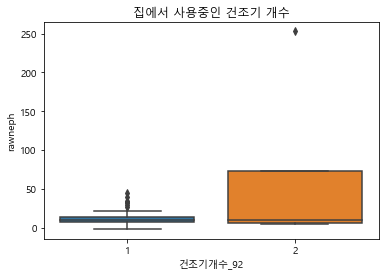

In [129]:
p =sns.boxplot(data = df_deleted[['건조기개수_92', 'rawneph']], x= '건조기개수_92', y = 'rawneph')
p.set(title = "집에서 사용중인 건조기 개수")
plt.show()

In [88]:
mappings = [
    { 1 : '0대', 2 : '1대', 3 : '2대', 4 : '3대', 5 : '4대이상'}, # 건조기개수_92 
    { 1 : '0대', 2 : '1대', 3 : '2대', 4 : '3대', 5 : '4대이상'}, # 냉장고개수_80 
    { 1 : '0대', 2 : '1대', 3 : '2대', 4 : '3대', 5 : '4대이상'}, # 전기오븐개수_86 
    { 1: '1년미만', 2: '1년이상 5년미만', 3: '5년이상 10년미만', 4: '10년이상 20년미만', 5: '20년이상', 6: '잘 모름'}, # 주택연수_5
    {1: '50 미만', 2: '50이상 100미만', 3: '100이상 150미만', 4: '150이상 200미만', 5: '200이상 300미만', 6: '300이상 400미만', 7: '400이상 600미만', 8:'600이상', 9:'모름'}, #월소득_77 
    {1 : '0대', 2 : '1대', 3 : '2대', 4 : '3대', 5 : '4대'}, # 전자렌지개수_84
    {1 : '학교 다니지 않음', 2 : '초등학교 중퇴', 3 : '중학교중퇴', 4 : '고등학교중퇴', 5: '고졸', 6: '기술(전문)학교졸', 7: '대학교중퇴', 8:'대졸(재학중)', 9: '대학원이상'}, #학력_74
    { 1 : '2회 이하', 2 : '3회이상 4회이하', 3: '5회이상 6회이하'}, # 일평균취사횟수_21
    { 1 : '0대', 2 : '1대', 3 : '2대', 4 : '3대', 5 : '4대이상'}, # 의류관리기개수_94
    {1 : '주거지역', 2: '상업지역', 3: '공단지역', 4: '녹지지역'}, # 가까운지역_60
    {1: '예', 2 : '아니오'}, # 드라이클리닝_41
    {1 : '5시간미만', 2 : '5이상 10미만', 3: '10이상 15미만', 4 : '15이상 20미만', 5: '20이상'}, # 평일집머뭄_64
    {1 : '5시간미만', 2 : '5이상 10미만', 3: '10이상 15미만', 4 : '15이상 20미만', 5: '20이상'}, # 주말집머뭄_65
    {1 : "0대", 2 : "1대", 3 : "2대", 4: "3대", 5: "4대이상"}, # 컴퓨터개수_100
    {1: '예', 2 : '아니오'}, # 가구구입_11
    {1: '예', 2 : '아니오'}, # 현관거실분리_12
    {1 : '2019년 이전', 2 : '2019년 이후'}, # 냉장고구입시기_81
    {1: '예', 2 : '아니오'}, # 가습기_35
    {1 : '단독주택', 2 : '연립주택/다세대주택', 3: '아파트', 4: '기타'}, # 거주형태_1
    {1 : '직장가입자', 2 : '지역가입자', 3 : '공무원/교직원공제', 4 : '의료보호', 5: '기타'}, # 의료보장형태_79
]

In [89]:
# create dataframe for box plot

top20 = df_sort['Question'].tolist()
df_plot = df_deleted[top20]


# Apply the re-encoding using a loop
for i, column in enumerate(df_plot.columns):
    df_plot[column] = df_plot[column].replace(mappings[i])
df_plot

<ipython-input-89-fcbd9302e06e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot[column] = df_plot[column].replace(mappings[i])


,건조기개수_92,냉장고개수_80,전기오븐개수_86,주택연수_5,월소득_77,전자렌지개수_84,학력_74,일평균취사횟수_21,의류관리기개수_94,가까운지역_60,드라이클리닝_41,평일집머뭄_64,주말집머뭄_65,컴퓨터개수_100,가구구입_11,현관거실분리_12,냉장고구입시기_81,가습기_35,거주형태_1,의료보장형태_79
0,0대,1대,0대,20년이상,200이상 300미만,0대,고졸,2회 이하,0대,주거지역,아니오,20이상,20이상,0대,아니오,예,2019년 이전,아니오,아파트,지역가입자
1,0대,1대,0대,20년이상,100이상 150미만,1대,고등학교중퇴,3회이상 4회이하,0대,주거지역,아니오,10이상 15미만,10이상 15미만,0대,아니오,아니오,2019년 이전,아니오,연립주택/다세대주택,지역가입자
2,0대,1대,0대,20년이상,100이상 150미만,1대,고졸,3회이상 4회이하,0대,주거지역,아니오,15이상 20미만,15이상 20미만,1대,아니오,아니오,2019년 이전,아니오,아파트,지역가입자
3,0대,1대,0대,10년이상 20년미만,600이상,1대,고졸,2회 이하,0대,주거지역,아니오,20이상,20이상,1대,아니오,아니오,2019년 이전,아니오,연립주택/다세대주택,지역가입자
4,0대,1대,0대,20년이상,150이상 200미만,1대,고등학교중퇴,2회 이하,0대,주거지역,아니오,15이상 20미만,20이상,0대,아니오,아니오,2019년 이전,아니오,아파트,직장가입자
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0대,1대,0대,1년이상 5년미만,50 미만,1대,고등학교중퇴,2회 이하,0대,주거지역,아니오,10이상 15미만,10이상 15미만,0대,아니오,아니오,2019년 이후,아니오,연립주택/다세대주택,지역가입자
62,0대,1대,0대,5년이상 10년미만,50 미만,1대,고졸,2회 이하,0대,주거지역,아니오,10이상 15미만,10이상 15미만,0대,아니오,예,2019년 이후,아니오,연립주택/다세대주택,지역가입자
63,0대,1대,1대,10년이상 20년미만,400이상 600미만,1대,대졸(재학중),2회 이하,0대,주거지역,아니오,15이상 20미만,15이상 20미만,0대,아니오,예,2019년 이전,아니오,아파트,지역가입자
64,0대,1대,0대,1년이상 5년미만,50 미만,1대,고등학교중퇴,2회 이하,0대,주거지역,아니오,15이상 20미만,15이상 20미만,0대,아니오,아니오,2019년 이후,아니오,연립주택/다세대주택,지역가입자


In [90]:
# rawneph  다시 추가하기

df_plot['rawneph'] = df_deleted['rawneph']
df_plot.head()

<ipython-input-90-5ca4a5e0a1f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['rawneph'] = df_deleted['rawneph']


,건조기개수_92,냉장고개수_80,전기오븐개수_86,주택연수_5,월소득_77,전자렌지개수_84,학력_74,일평균취사횟수_21,의류관리기개수_94,가까운지역_60,...,평일집머뭄_64,주말집머뭄_65,컴퓨터개수_100,가구구입_11,현관거실분리_12,냉장고구입시기_81,가습기_35,거주형태_1,의료보장형태_79,rawneph
0,0대,1대,0대,20년이상,200이상 300미만,0대,고졸,2회 이하,0대,주거지역,...,20이상,20이상,0대,아니오,예,2019년 이전,아니오,아파트,지역가입자,32.802385
1,0대,1대,0대,20년이상,100이상 150미만,1대,고등학교중퇴,3회이상 4회이하,0대,주거지역,...,10이상 15미만,10이상 15미만,0대,아니오,아니오,2019년 이전,아니오,연립주택/다세대주택,지역가입자,27.030514
2,0대,1대,0대,20년이상,100이상 150미만,1대,고졸,3회이상 4회이하,0대,주거지역,...,15이상 20미만,15이상 20미만,1대,아니오,아니오,2019년 이전,아니오,아파트,지역가입자,22.300030
3,0대,1대,0대,10년이상 20년미만,600이상,1대,고졸,2회 이하,0대,주거지역,...,20이상,20이상,1대,아니오,아니오,2019년 이전,아니오,연립주택/다세대주택,지역가입자,29.382376
4,0대,1대,0대,20년이상,150이상 200미만,1대,고등학교중퇴,2회 이하,0대,주거지역,...,15이상 20미만,20이상,0대,아니오,아니오,2019년 이전,아니오,아파트,직장가입자,15.714330


In [91]:
# 위의 data 저장하기

df_plot.to_csv('C:/Users/soyou/Dropbox/미세먼지건강영향평가/노출평가 설문데이터/survey_top20.csv', index = False, encoding = 'utf-8-sig')

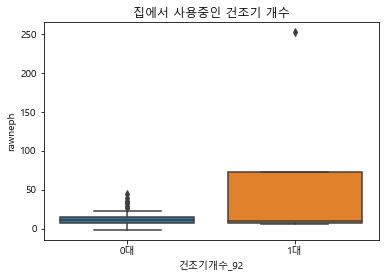

In [134]:
# 다시 box plot 그려보기

p =sns.boxplot(data = df_plot[['건조기개수_92', 'rawneph']], x= '건조기개수_92', y = 'rawneph')
p.set(title = "집에서 사용중인 건조기 개수")
plt.show()

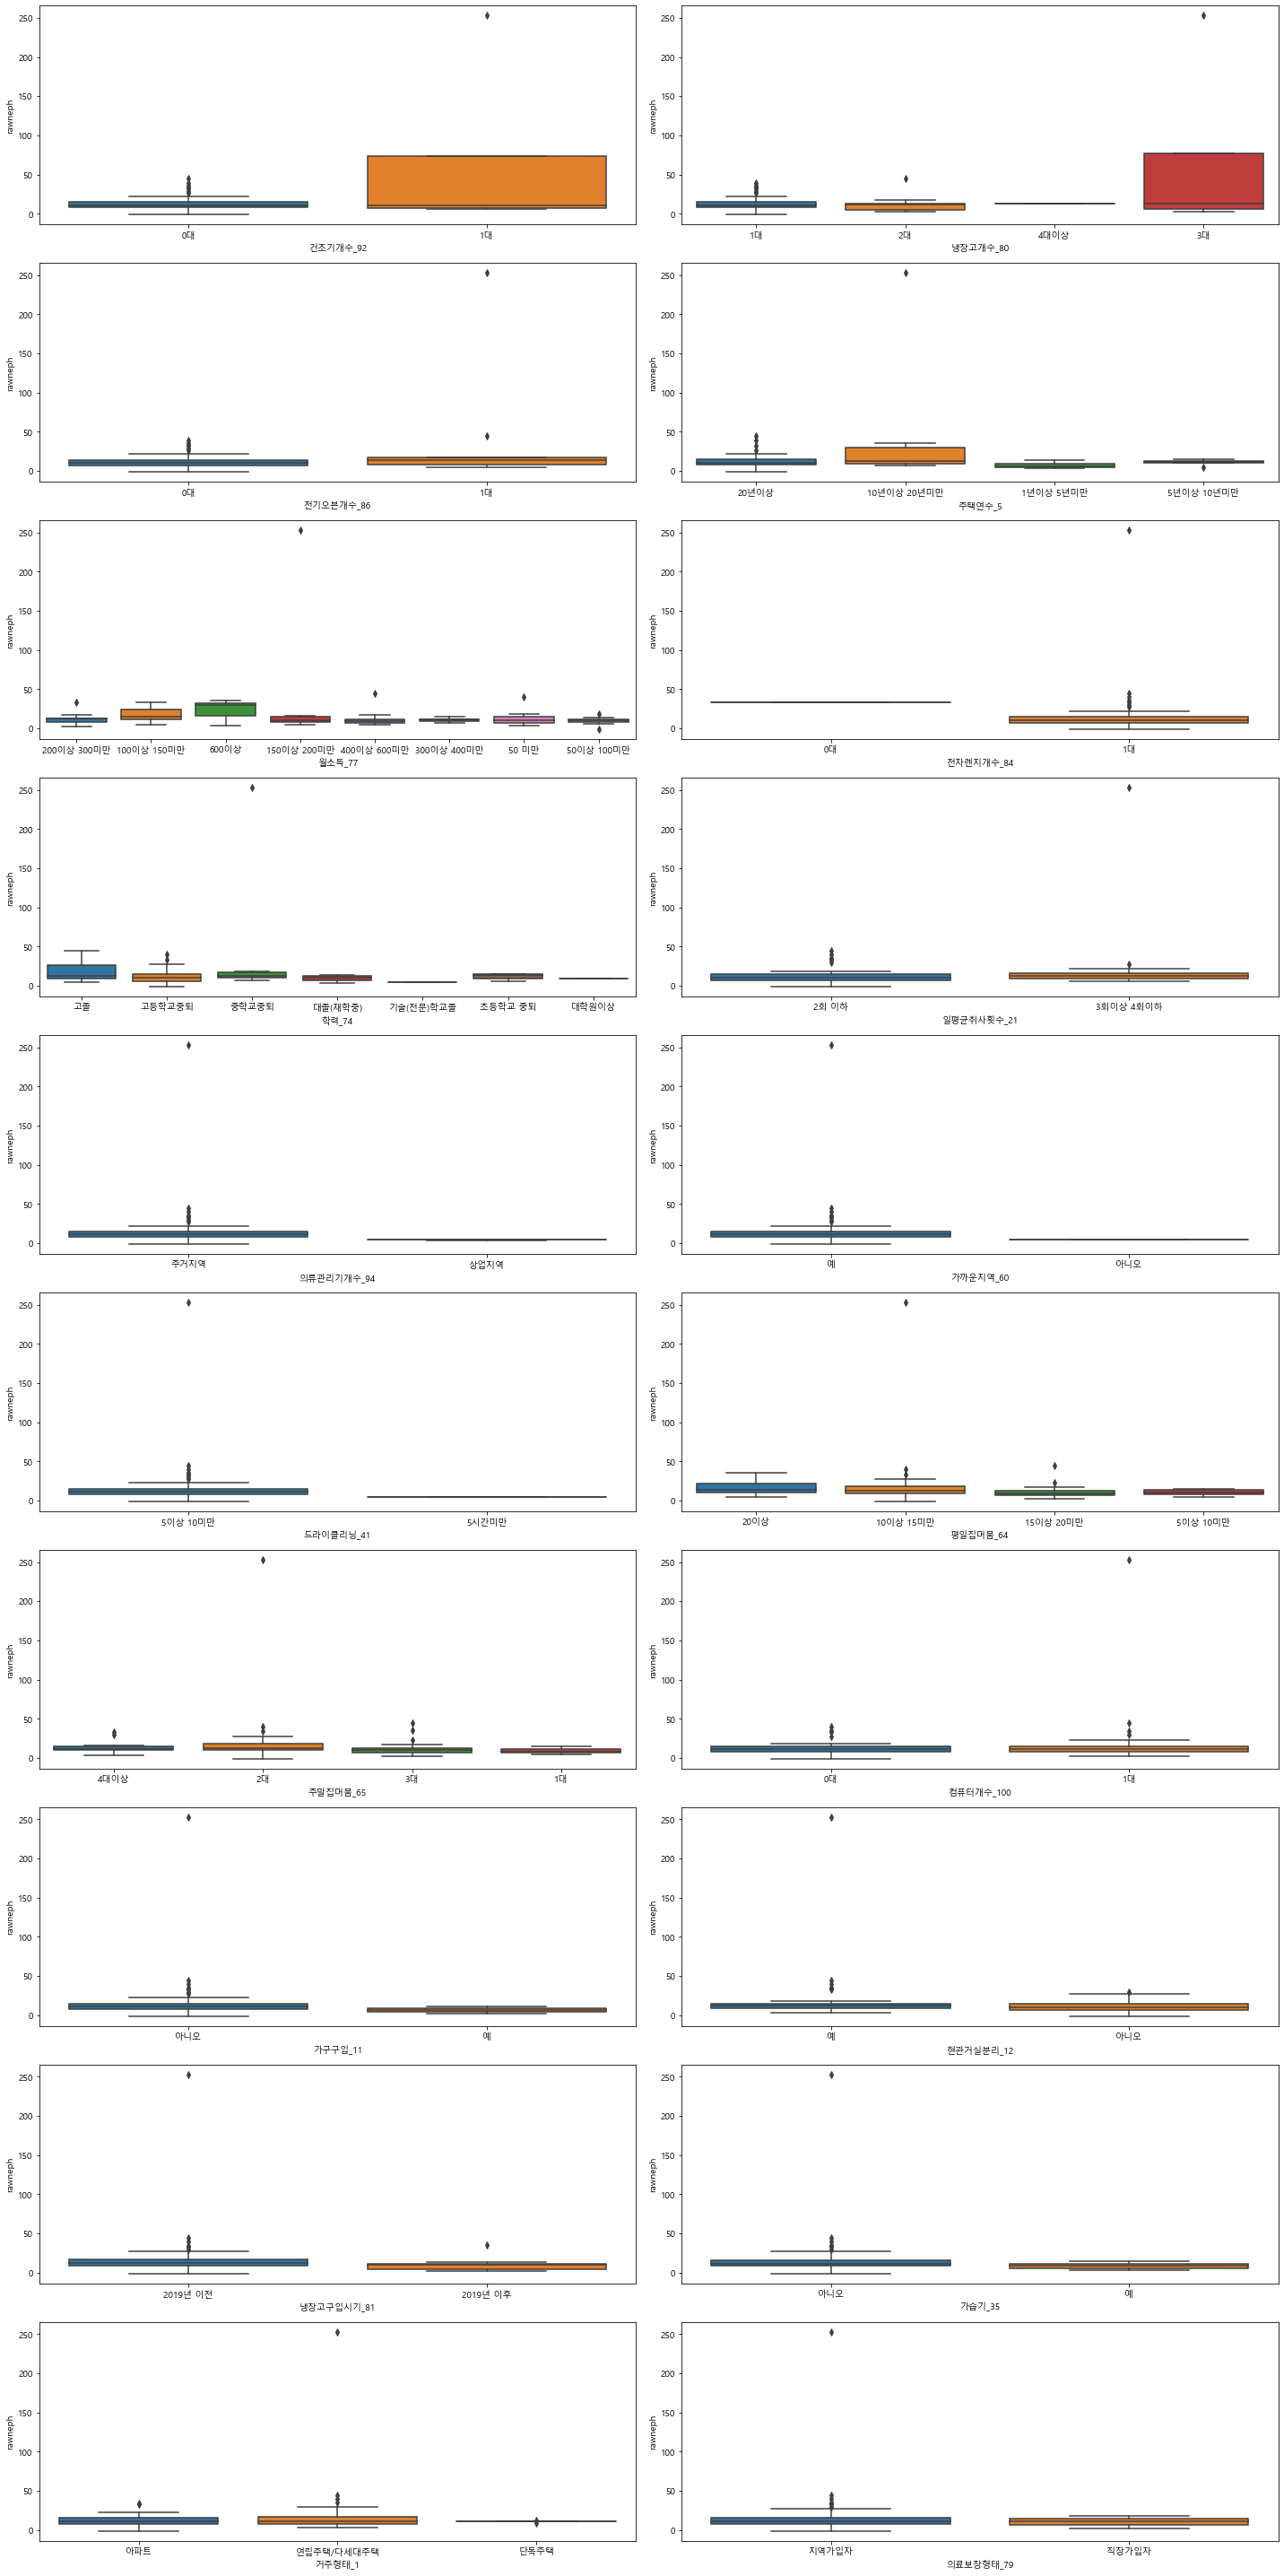

In [135]:
# top 20 boxplot 한꺼번에 그리기

fig, axes = plt.subplots(nrows = 10, ncols = 2, figsize=(20,40))
for idx, var in enumerate(top20):
    row = idx // 2
    col = idx % 2
    
    ax = axes[row][col]
    sns.boxplot(data = df_plot[[var, 'rawneph']], x = var, y = 'rawneph', ax = ax)

plt.tight_layout()
plt.show()

In [103]:
# Outlier들 때문에 경향성이 분명히 보이지 않으므로, rawneph log변환 추가

df_plot['rawneph_log'] = np.log(df_plot['rawneph'])

C:\Users\soyou\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-103-6bc28befe8da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['rawneph_log'] = np.log(df_plot['rawneph'])


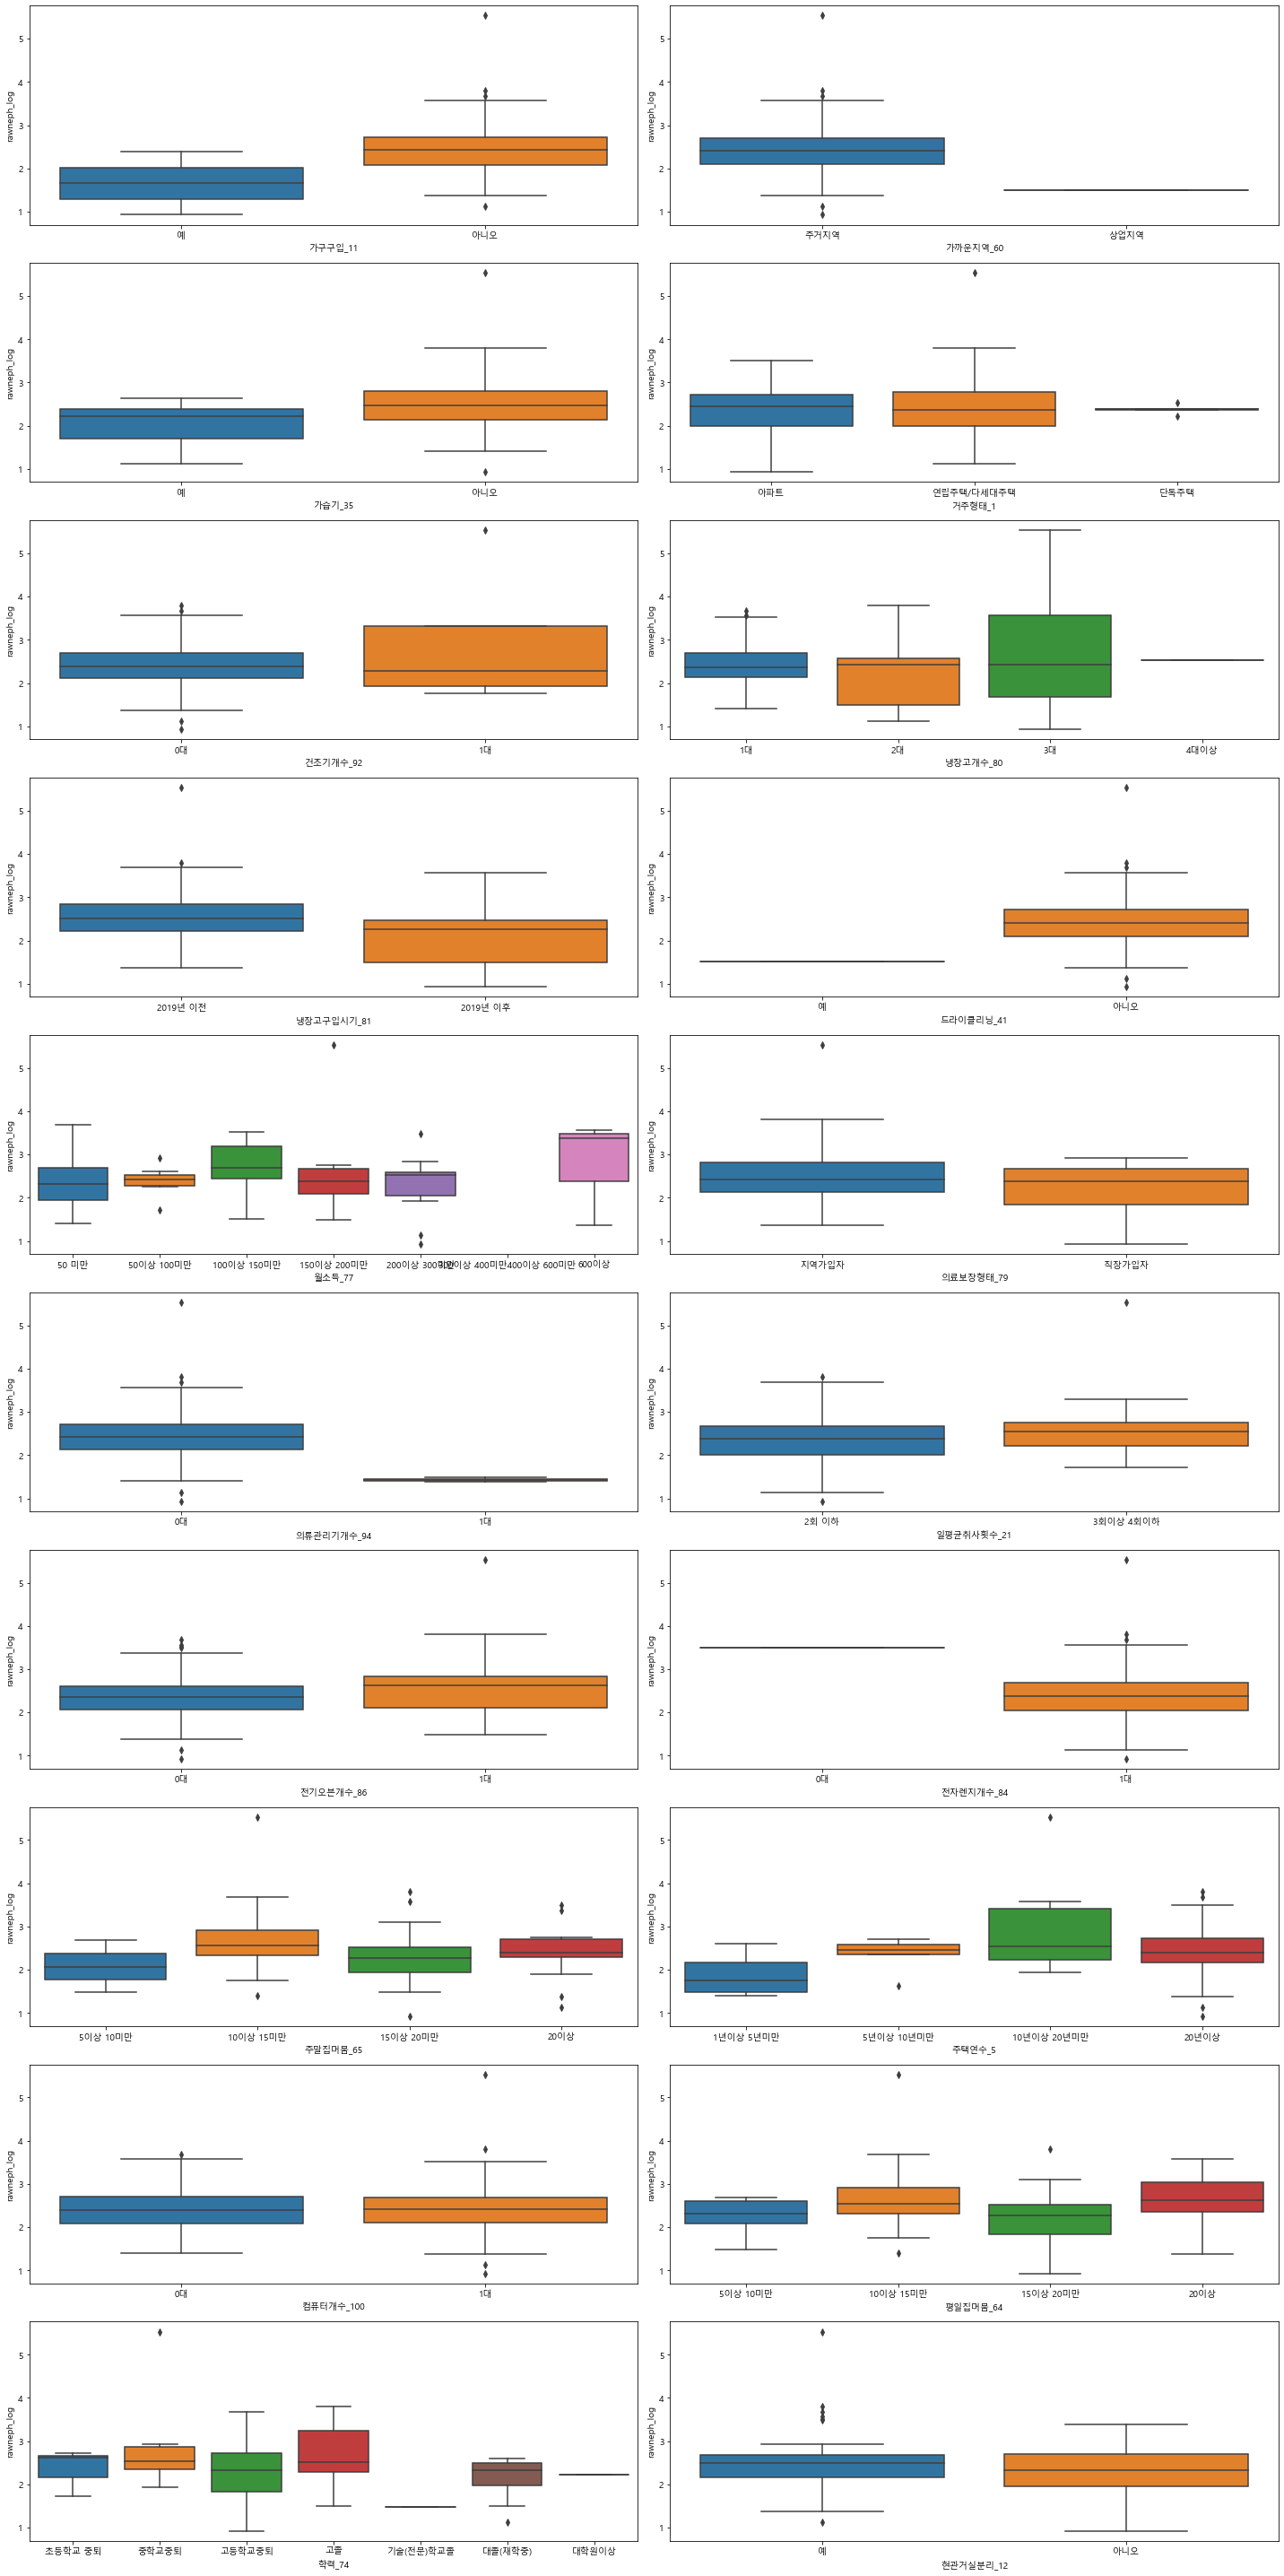

In [105]:
# top 20 boxplot 다시 그리기

fig, axes = plt.subplots(nrows = 10, ncols = 2, figsize=(20,40))
for idx, var in enumerate(top20):
    row = idx // 2
    col = idx % 2
    
    ax = axes[row][col]
    sns.boxplot(data = df_plot[[var, 'rawneph_log']], x = var, y = 'rawneph_log', ax = ax)

plt.tight_layout()
plt.show()

In [94]:
# 답변 항목 순서가 뒤죽박죽이므로 순서 정렬하기

# 현재 순서 현황
cat_order = []
top20 = df_plot.columns.difference(['rawneph', 'rawneph_log']).tolist()
for i in top20:
    cat_order.append(df_plot[i].unique().tolist())
cat_order

[['아니오', '예'],
 ['주거지역', '상업지역'],
 ['아니오', '예'],
 ['아파트', '연립주택/다세대주택', '단독주택'],
 ['0대', '1대'],
 ['1대', '2대', '4대이상', '3대'],
 ['2019년 이전', '2019년 이후'],
 ['아니오', '예'],
 ['200이상 300미만',
  '100이상 150미만',
  '600이상',
  '150이상 200미만',
  '400이상 600미만',
  '300이상 400미만',
  '50 미만',
  '50이상 100미만'],
 ['지역가입자', '직장가입자'],
 ['0대', '1대'],
 ['2회 이하', '3회이상 4회이하'],
 ['0대', '1대'],
 ['0대', '1대'],
 ['20이상', '10이상 15미만', '15이상 20미만', '5이상 10미만'],
 ['20년이상', '10년이상 20년미만', '1년이상 5년미만', '5년이상 10년미만'],
 ['0대', '1대'],
 ['20이상', '10이상 15미만', '15이상 20미만', '5이상 10미만'],
 ['고졸', '고등학교중퇴', '중학교중퇴', '대졸(재학중)', '기술(전문)학교졸', '초등학교 중퇴', '대학원이상'],
 ['예', '아니오']]

In [96]:
# 순서 재정렬

cat_reorder = [['예', '아니오'],
 ['주거지역', '상업지역'],
 ['예', '아니오'],
 ['아파트', '연립주택/다세대주택', '단독주택'],
 ['0대', '1대'],
 ['1대', '2대', '3대','4대이상'],
 ['2019년 이전', '2019년 이후'],
 ['예', '아니오'],
 ['50 미만',
  '50이상 100미만',
  '100이상 150미만',
  '150이상 200미만',
  '200이상 300미만',
  '300이상 400미만'
  '400이상 600미만',
  '600이상'],
 ['지역가입자', '직장가입자'],
 ['0대', '1대'],
 ['2회 이하', '3회이상 4회이하'],
 ['0대', '1대'],
 ['0대', '1대'],
 ['5이상 10미만', '10이상 15미만', '15이상 20미만', '20이상'],
 ['1년이상 5년미만', '5년이상 10년미만', '10년이상 20년미만','20년이상'],
 ['0대', '1대'],
 ['5이상 10미만', '10이상 15미만', '15이상 20미만', '20이상'],
 ['초등학교 중퇴', '중학교중퇴', '고등학교중퇴', '고졸','기술(전문)학교졸', '대졸(재학중)','대학원이상'],
 ['예', '아니오']]

In [97]:
# data type이 object인 컬럼명만 리스트로 만들기 
object_columns = df_plot.select_dtypes(include=['object']).columns

# 카테고리 타입으로 바꾸기 
for column in object_columns:
    df_plot[column] = df_plot[column].astype('category')
    
# 카테고리 순서 정해주기
for i,var in enumerate(top20):
    df_plot[var] = df_plot[var].cat.set_categories(cat_reorder[i],ordered = True)

<ipython-input-97-50e35bac49e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot[column] = df_plot[column].astype('category')
<ipython-input-97-50e35bac49e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot[column] = df_plot[column].astype('category')
<ipython-input-97-50e35bac49e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

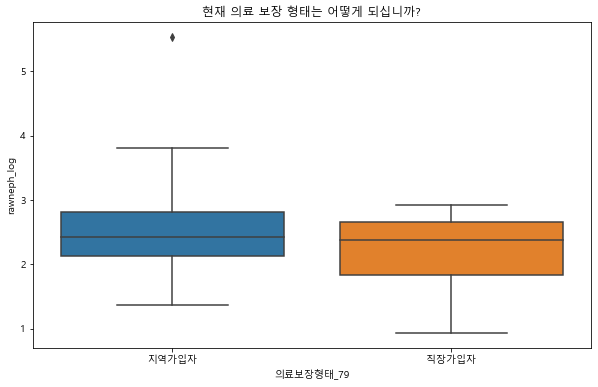

In [130]:
# 개별 plot 그려서 저장하기
fig, axe = plt.subplots(figsize = (10,6))
var_name = df_plot.columns.tolist()[19]
p =sns.boxplot(data = df_plot[[var_name, 'rawneph_log']], x= var_name, y = 'rawneph_log')
p.set(title = "현재 의료 보장 형태는 어떻게 되십니까?")
file_path = r'C:\Users\soyou\Dropbox\미세먼지건강영향평가\노출평가 설문데이터\그래프\{}.png'.format(var_name)
plt.savefig(file_path, bbox_inches = 'tight', facecolor='#ffffff')

## 예측 모델링

### 설문조사 데이터로 미세먼지 예측

In [28]:
# 데이터 불러오기

file_path = 'C:/Users/soyou/Dropbox/미세먼지건강영향평가/노출평가 설문데이터/survey_merge.csv'
df = pd.read_csv(file_path)
df.head()

,참여자 ID,참여자 이름,거주형태_1,층수_2,건물유형_3,평수_4,주택연수_5,거주연수_6,거실바닥_7,거실벽면_8,...,TV구입시기_99,컴퓨터개수_100,컴퓨터구입시기_101,노트북개수_102,노트북구입시기_103,프린터개수_104,프린터구입시기_105,Name,FilterID,rawneph
0,1,황명숙,3,4,2,37,5,5,1,1,...,1.0,1,NaN,1,NaN,1,NaN,황명숙,KEE1105,32.802385
1,2,손미숙,2,3,2,20,5,2,1,1,...,1.0,1,NaN,1,NaN,1,NaN,손미숙,KEE1108,27.030514
2,3,이명옥,3,10,2,31,5,5,1,1,...,1.0,2,1.0,2,1.0,1,NaN,이명옥,KEE1111,22.300030
3,4,이금순,2,4,2,40,4,4,1,1,...,1.0,2,1.0,1,NaN,2,1.0,이금순,KEE1124,29.382376
4,5,박종석,3,4,2,30,5,5,1,1,...,1.0,1,NaN,2,1.0,1,NaN,박종석,KEE1191,15.714330


In [29]:
# 참여자 이름, 참여자 ID, Name, FilterID 제거

df = df.drop(['참여자 이름','참여자 ID', 'Name', 'FilterID'], axis = 1)
df.head()

,거주형태_1,층수_2,건물유형_3,평수_4,주택연수_5,거주연수_6,거실바닥_7,거실벽면_8,개보수_9,개보수항목_10,...,공기청정기구입시기_97,TV개수_98,TV구입시기_99,컴퓨터개수_100,컴퓨터구입시기_101,노트북개수_102,노트북구입시기_103,프린터개수_104,프린터구입시기_105,rawneph
0,3,4,2,37,5,5,1,1,2,NaN,...,1.0,2,1.0,1,NaN,1,NaN,1,NaN,32.802385
1,2,3,2,20,5,2,1,1,2,NaN,...,1.0,2,1.0,1,NaN,1,NaN,1,NaN,27.030514
2,3,10,2,31,5,5,1,1,2,NaN,...,1.0,2,1.0,2,1.0,2,1.0,1,NaN,22.300030
3,2,4,2,40,4,4,1,1,1,4.0,...,1.0,2,1.0,2,1.0,1,NaN,2,1.0,29.382376
4,3,4,2,30,5,5,1,1,2,NaN,...,1.0,2,1.0,1,NaN,2,1.0,1,NaN,15.714330


## 더미변수 만들기

predictor와 target 나눈후 predictor의 categorical 변수들 더미변수화

In [45]:
# predictor와 target 나누기 
dfX = df.iloc[:,:-1]
dfy = df['rawneph']

# predictor를 선택형/ 개방형 구분하기

# 코드북 불러오기
file_path_2 = 'C:/Users/soyou/Dropbox/미세먼지건강영향평가/노출평가 설문데이터/설문조사 코드북.xlsx'
code = pd.read_excel(file_path_2)

dfX_A = dfX[code.loc[code['질문유형'] == "A"]['종류'].tolist()] # 선택형
dfX_B = dfX[code.loc[code['질문유형'] == "B"]['종류'].tolist()] # 개방형
dfX_D = dfX[code.loc[code['질문유형'] == "A_D"]['종류'].tolist()] # 중복형

### 단일 선택형 더미변수화

In [38]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
dfX_A_ohe = ohe.fit_transform(dfX_A)
dfX_A_ohe = pd.DataFrame(dfX_A_ohe, columns = ohe.get_feature_names_out())
dfX_A_ohe.head()


,거주형태_1_1,거주형태_1_2,거주형태_1_3,건물유형_3_2,주택연수_5_2,주택연수_5_3,주택연수_5_4,주택연수_5_5,거주연수_6_2,거주연수_6_3,...,노트북개수_102_2,노트북개수_102_3,노트북구입시기_103_1.0,노트북구입시기_103_2.0,노트북구입시기_103_nan,프린터개수_104_1,프린터개수_104_2,프린터구입시기_105_1.0,프린터구입시기_105_2.0,프린터구입시기_105_nan
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### 복수 선택형 더미 변수 만들기

In [90]:
# 복수 선택형은 '거실바닥_7', '거실벽면_8', '개보수항목_10', '취사연료_20', '바닥청소_58', '습기_59', '동거인_72'
def get_dummy(Question, all_choice):
    
    # Given survey data
    survey_data = dfX_D[Question]

    # Set of all possible answer choices
    # all_choices = {1, 2, 3, 4}
    all_choices = all_choice

    # List to store the dictionaries representing the dummy variables
    dummy_variables = []

    # Iterate through each response in the survey data
    for response in survey_data:
        # Split the response to get individual answers
        answers = response.split(',')

        # Create a dictionary to represent the dummy variables for this response
        dummy_dict = {choice: 0 for choice in all_choices}

        # Update the dictionary to set the dummy variable values to 1 for the corresponding answers
        for answer in answers:
            dummy_dict[int(answer)] = 1

        # Append the dictionary to the list
        dummy_variables.append(dummy_dict)

    # Convert the list of dictionaries to a DataFrame
    df_AD = pd.DataFrame(dummy_variables)
    df_AD.columns = [Question +'_' + str(i+1) for i in range(len(all_choices))]
    
    return df_AD

In [120]:
# '거실바닥_7', '거실벽면_8', '개보수항목_10', '취사연료_20', '바닥청소_58', '습기_59', '동거인_72'
# '거실바닥_7' : 모두 단답으로 대답함
# '개보수항목_10' : 대답한 사람 거의 없음. 3, 4, NA 
# '취사연료_20' : NA 있음..
# 습기 : 중복 없음


df_58 = get_dummy('바닥청소_58', {1,2,3,4})
df_8 = get_dummy('거실벽면_8', {1,2,3})
df_72 = get_dummy('동거인_72', {1,2,3,4,5})

In [122]:
# 거실바닥, 습기, 바닥청소, 거실벽면, 동거인 합치기

dfX_D_new = pd.concat([dfX_D[['거실바닥_7']], dfX_D[['습기_59']], df_58, df_8, df_72], axis = 1)
dfX_D_new.head()

,거실바닥_7,습기_59,바닥청소_58_1,바닥청소_58_2,바닥청소_58_3,바닥청소_58_4,거실벽면_8_1,거실벽면_8_2,거실벽면_8_3,동거인_72_1,동거인_72_2,동거인_72_3,동거인_72_4,동거인_72_5
0,1,2,1,1,1,0,1,0,0,0,1,0,0,0
1,1,6,0,1,0,0,1,0,0,0,1,0,0,0
2,1,6,0,1,0,0,1,0,0,0,1,1,0,0
3,1,3,0,0,1,0,1,0,0,0,1,0,0,0
4,1,6,0,1,1,0,1,0,0,0,1,0,0,0


### 개방형에서 '공기청정기위치_54' 제거

In [124]:
dfX_B_new = dfX_B.drop(['공기청정기위치_54'], axis = 1)

### 단일선택형, 중복형, 개방형 모두 합치기

In [136]:
# dfX_A, dfX_B_new, dfX_D_new 다시 합치기

dfX_new = pd.concat([dfX_A_ohe, dfX_D_new, dfX_B_new], axis = 1)
dfX_new.head()

,거주형태_1_1,거주형태_1_2,거주형태_1_3,건물유형_3_2,주택연수_5_2,주택연수_5_3,주택연수_5_4,주택연수_5_5,거주연수_6_2,거주연수_6_3,...,거실벽면_8_3,동거인_72_1,동거인_72_2,동거인_72_3,동거인_72_4,동거인_72_5,층수_2,평수_4,환기횟수_48,환기시간_49
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,4,37,1.0,0.5
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,1,0,0,0,3,20,2.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,1,0,0,10,31,5.0,8.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,4,40,5.0,24.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,4,30,1.0,0.3


## 머신러닝 모델링

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import lightgbm as lgb

### NA 확인

In [137]:
df_na = dfX_new.isna().sum().reset_index()
df_na.columns = ['index', 'na']
df_na.loc[df_na['na'] >0]

,index,na
316,환기횟수_48,6
317,환기시간_49,8


In [141]:
# 어떤 모델은 NA가 포함되어 있으면 동작하지 않음... 
# NA 제거하기

df_combined = pd.concat([dfX_new, dfy], axis = 1)
df_na_removed = df_combined.dropna(how = 'any', axis = 0) # 최종적으로 56명만 남음

In [142]:
# 다시 predictor와 target으로 나누기

dfX = df_na_removed.iloc[:,:-1]
dfy = df_na_removed['rawneph']

In [175]:
# Train set, test set 나누기
X_train, X_test, y_train, y_test = train_test_split(dfX, np.log(dfy+3), random_state=12)

In [188]:
df_na_removed.to_csv('C:/Users/soyou/Dropbox/미세먼지건강영향평가/노출평가 설문데이터/df_na_removed.csv', index =False, encoding = 'utf-8-sig')

### Random Forest 모델

In [163]:
forest = RandomForestRegressor(max_features = "log2", random_state = 2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

print("="*50)
print("Accuracy on Training set :{:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on Test set :{:.3f}".format(forest.score(X_test, y_test)))
print("="*50)

y_test_r = np.exp(y_test) - 3
y_pred_r = np.exp(y_pred) - 3

print("·MAE:",mean_absolute_error(y_test_r, y_pred_r))
print("·MSE:", mean_squared_error(y_test_r, y_pred_r))
print("·RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_r)))
print("="*50)

Accuracy on Training set :0.844
Accuracy on Test set :-1.392
·MAE: 9.077825393991363
·MSE: 92.08411246588653
·RMSE: 9.59604671028057


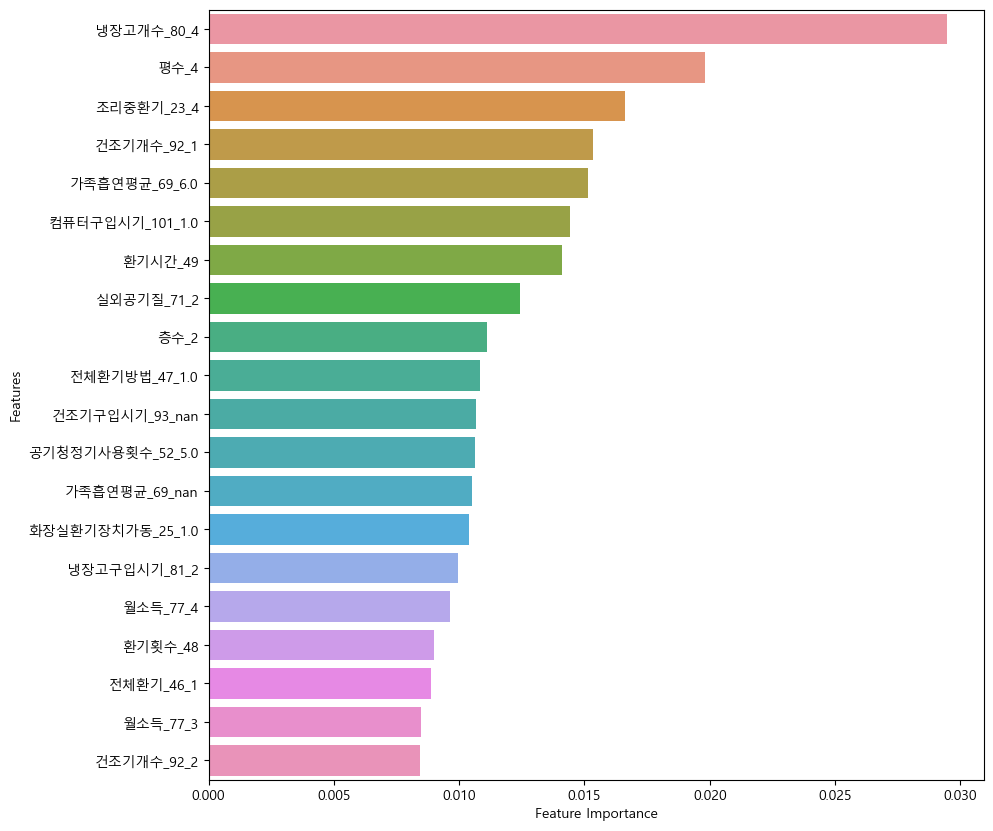

In [203]:
# random forest Model Feature importance

feature_imp = pd.DataFrame({'Features' : forest.feature_names_in_, 'Feature Importance' : forest.feature_importances_})
feature_imp = feature_imp.sort_values(by = 'Feature Importance', ascending = False).reset_index(drop = True)

plt.figure(figsize= (10,10))
sns.barplot(x = 'Feature Importance', y = 'Features', data = feature_imp[0:20])
plt.show()

## Gradient Boost Regressor

In [178]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.01, random_state = 30)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

print("="*50)
print("Accuracy on Training set :{:.3f}".format(gbr.score(X_train, y_train)))
print("Accuracy on Test set :{:.3f}".format(gbr.score(X_test, y_test)))
print("="*50)

y_test_r = np.exp(y_test) - 3
y_pred_r = np.exp(y_pred) - 3

print("·MAE:",mean_absolute_error(y_test_r, y_pred_r))
print("·MSE:", mean_squared_error(y_test_r, y_pred_r))
print("·RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_r)))
print("="*50)

Accuracy on Training set :0.687
Accuracy on Test set :-1.441
·MAE: 8.519388518182321
·MSE: 121.72582584787187
·RMSE: 11.032942755578489


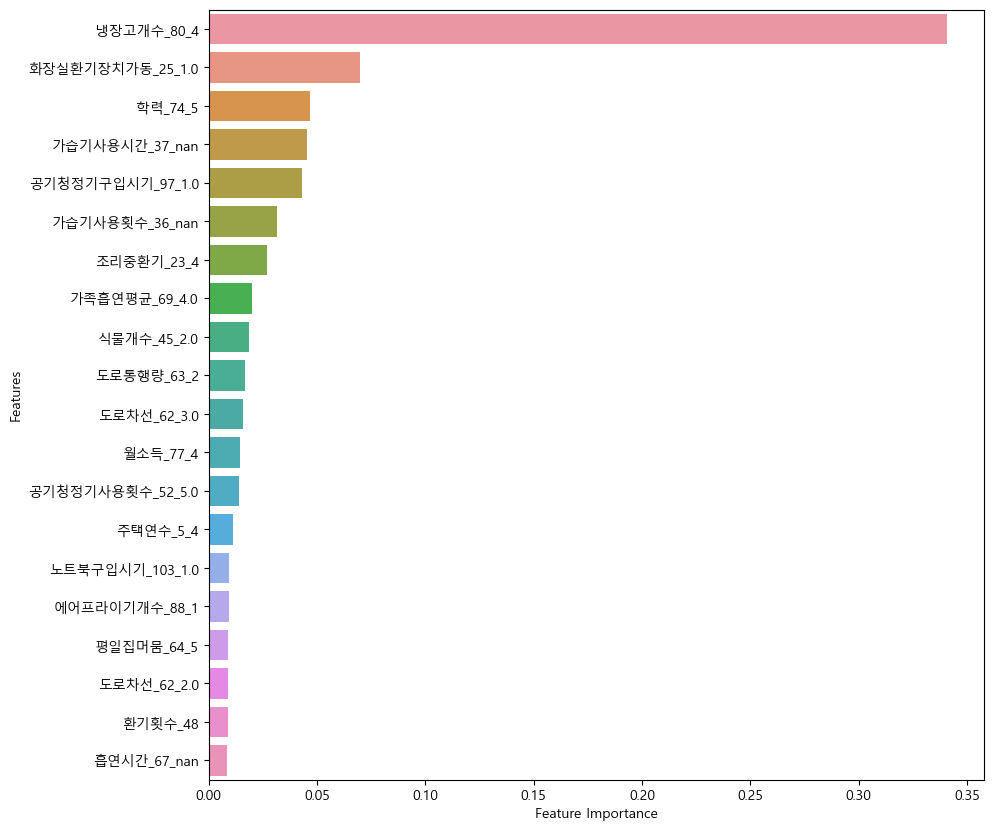

In [179]:
# gbr Model Feature importance

feature_imp = pd.DataFrame({'Features' : gbr.feature_names_in_, 'Feature Importance' : gbr.feature_importances_})
feature_imp = feature_imp.sort_values(by = 'Feature Importance', ascending = False).reset_index(drop = True)

plt.figure(figsize= (10,10))
sns.barplot(x = 'Feature Importance', y = 'Features', data = feature_imp[0:20])
plt.show()

### 10-Fold Cross Validation

In [197]:
from sklearn.model_selection import cross_validate

scores = cross_validate(gbr, dfX, dfy, cv=5, scoring=('r2', 'neg_mean_absolute_error','neg_mean_squared_error',
                                                                 'neg_root_mean_squared_error'), return_train_score=False)
scores

{'fit_time': array([0.13689733, 0.07539654, 0.08847094, 0.07808018, 0.07542157]),
 'score_time': array([0.00521541, 0.00642157, 0.00400281, 0.00361514, 0.00398803]),
 'test_r2': array([-1.90503950e-01, -6.61090282e+00,  4.52956989e-02, -2.74360509e+00,
        -5.94630096e+01]),
 'test_neg_mean_absolute_error': array([-27.22178818, -16.33997045,  -7.86996008,  -7.37201149,
        -14.81612775]),
 'test_neg_mean_squared_error': array([-5002.94502513,  -919.99967311,  -108.94095047,   -73.67722361,
         -908.63043321]),
 'test_neg_root_mean_squared_error': array([-70.73149953, -30.33149639, -10.43747817,  -8.58354377,
        -30.14349736])}

In [202]:
# Random Forest

from sklearn.model_selection import KFold

dfy_log = np.log(dfy+3)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Train and Test the Model

mae_list = []
mse_list = []
rmse_list = []
score_list = []

for train_index, test_index in kfold.split(dfX):
    X_train, X_test = dfX.loc[train_index], dfX.loc[test_index]
    y_train, y_test = dfy_log[train_index], dfy_log[test_index]

    forest = RandomForestRegressor(max_features = "log2", random_state = 2)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)

    y_test_r = np.exp(y_test) - 3
    y_pred_r = np.exp(y_pred) - 3
    
    mae = mean_absolute_error(y_test_r, y_pred_r)
    mse = mean_squared_error(y_test_r, y_pred_r)
    rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
    score = gbr.score(X_test, y_test)

    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    score_list.append(score)

print("Mean MAE : {}\nMean MAE : {}\nMean RMSE : {}\nMean Score(R-squared) : {}".format(np.mean(mae_list), np.mean(mse_list), np.mean(rmse_list), np.mean(score_list)))


Mean MAE : 11.64812205338504
Mean MAE : 1255.2397310357592
Mean RMSE : 19.07775860103428
Mean Score(R-squared) : 0.3817627270748966


In [200]:
# Gradient Regressor Model

from sklearn.model_selection import KFold

dfy_log = np.log(dfy+3)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Train and Test the Model

mae_list = []
mse_list = []
rmse_list = []
score_list = []

for train_index, test_index in kfold.split(dfX):
    X_train, X_test = dfX.loc[train_index], dfX.loc[test_index]
    y_train, y_test = dfy_log[train_index], dfy_log[test_index]

    gbr = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.01, random_state = 30)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)

    y_test_r = np.exp(y_test) - 3
    y_pred_r = np.exp(y_pred) - 3
    
    mae = mean_absolute_error(y_test_r, y_pred_r)
    mse = mean_squared_error(y_test_r, y_pred_r)
    rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
    score = gbr.score(X_test, y_test)

    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    score_list.append(score)

print("Mean MAE : {}\nMean MAE : {}\nMean RMSE : {}\nMean Score(R-squared) : {}".format(np.mean(mae_list), np.mean(mse_list), np.mean(rmse_list), np.mean(score_list)))


Mean MAE : 12.357689327739894
Mean MAE : 1280.4553038991853
Mean RMSE : 20.054172606167704
Mean Score(R-squared) : -0.6467485968229483


### 딥러닝 모델링

In [10]:
# 파일 불러오기

file_path = 'C:/Users/soyou/Dropbox/미세먼지건강영향평가/노출평가 설문데이터/df_na_removed.csv'
df = pd.read_csv(file_path)
df.head()

,거주형태_1_1,거주형태_1_2,거주형태_1_3,건물유형_3_2,주택연수_5_2,주택연수_5_3,주택연수_5_4,주택연수_5_5,거주연수_6_2,거주연수_6_3,...,동거인_72_1,동거인_72_2,동거인_72_3,동거인_72_4,동거인_72_5,층수_2,평수_4,환기횟수_48,환기시간_49,rawneph
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,4,37,1.0,0.5,32.802385
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,0,0,0,3,20,2.0,1.0,27.030514
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,1,0,0,10,31,5.0,8.0,22.300030
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,4,40,5.0,24.0,29.382376
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,4,30,1.0,0.3,15.714330


In [13]:
# predictor와 target 분리하기

dfX = df.iloc[:, :-1]
dfy = df['rawneph']

In [30]:
# train set, test set 분리

X_train, X_test, y_train, y_test = train_test_split(dfX, np.log(dfy+3), random_state=12)

### Deep Learning Model 1

In [34]:
# 모델 만들기 

X = tf.keras.layers.Input(shape = [318])
H = tf.keras.layers.Dense(10, activation = 'relu')(X)
H1 = tf.keras.layers.Dense(10, activation='relu')(H) # two hidden layers
y = tf.keras.layers.Dense(1)(H1)
model = tf.keras.models.Model(X,y)
model.compile(loss = 'mse')

model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [37]:
model.predict(X_test)

1/1 [==============================] - 0s 57ms/step


array([[0.20348692],
       [0.20348692],
       [0.20348692],
       [0.20348692],
       [0.20348692],
       [0.20348692],
       [0.20348692],
       [0.20348692],
       [0.20348692],
       [0.20348692],
       [0.20348692],
       [0.20348692],
       [0.20348692],
       [0.20348692]], dtype=float32)

=> hidden layer 추가하니 오히려 예측값이 더 안좋음

### Deep Learning Model 2

In [52]:

# train set, test set 분리
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, random_state=12)

# 모델 만들기

X = tf.keras.layers.Input(shape = [318])
H = tf.keras.layers.Dense(5, activation = 'swish')(X)
y = tf.keras.layers.Dense(1)(H)
model3 = tf.keras.models.Model(X,y)
model3.compile(loss = 'mse')

model3.fit(X_train, y_train, epochs = 100, verbose = 0)
y_pred = model3.predict(X_test)

print("·MAE:",mean_absolute_error(y_test, y_pred))
print("·MSE:", mean_squared_error(y_test, y_pred))
print("·RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("="*50)

1/1 [==============================] - 0s 44ms/step
·MAE: 4.550086611978934
·MSE: 27.36366537703961
·RMSE: 5.231029093499635


In [94]:
# Regression metrics
y_test_1 = np.array(y_test)
y_pred_1 = np.array(y_pred).reshape(-1).astype(np.float64)

# Convert NumPy arrays to TensorFlow tensors
y_test_2 = tf.convert_to_tensor(y_test_1)
y_pred_2 = tf.convert_to_tensor(y_pred_1)


mse = tf.keras.losses.mean_squared_error(y_test_2, y_pred_2)
rmse = tf.sqrt(mse)
mae = tf.keras.losses.mean_absolute_error(y_test_2, y_pred_2)
r2 = 1.0 - tf.keras.backend.mean(tf.keras.backend.square(y_test_2 - y_pred_2)) / tf.keras.backend.mean(tf.keras.backend.square(y_test_2 - tf.keras.backend.mean(y_test_2)))

print("Mean Squared Error (MSE):", mse.numpy())
print("Root Mean Squared Error (RMSE):", rmse.numpy())
print("Mean Absolute Error (MAE):", mae.numpy())
print("R-squared (R2):", r2.numpy())

Mean Squared Error (MSE): 27.363665377039613
Root Mean Squared Error (RMSE): 5.231029093499635
Mean Absolute Error (MAE): 4.5500866119789345
R-squared (R2): -0.19103316440775697


### Permutation importance 확인

In [109]:
import eli5
from eli5.sklearn import PermutationImportance

# Wrap your Keras model with PermutationImportance from eli5
perm = PermutationImportance(model3, scoring='neg_mean_absolute_error', random_state=42)

# Fit the PermutationImportance object with your test data
perm.fit(X_test, y_test)

# Get the feature importances
feature_importances = eli5.format_as_dataframe(eli5.explain_weights(perm))
print(feature_importances)

1/1 [==============================] - 0s 29ms/step
   feature    weight       std
0      x16  0.028358  0.009274
1     x258  0.022407  0.004604
2     x119  0.017177  0.004860
3     x172  0.015179  0.004684
4     x148  0.014237  0.010761
5     x316  0.012316  0.016548
6     x233  0.011569  0.006474
7     x201  0.011474  0.003884
8     x281  0.011360  0.004784
9     x193  0.010878  0.003164
10      x9  0.010221  0.003908
11    x244  0.009201  0.005669
12    x284  0.008893  0.004133
13    x130  0.008496  0.008466
14     x83  0.008433  0.004253
15    x286  0.008307  0.005204
16    x309  0.008080  0.003634
17    x139  0.008070  0.003245
18    x181  0.008070  0.000674
19    x216  0.008066  0.005039


In [110]:
eli5.show_weights(perm, feature_names = dfX.columns.tolist())

Weight,Feature
0.0284 ± 0.0185,현관거실분리_12_1
0.0224 ± 0.0092,세탁기구입시기_91_1
0.0172 ± 0.0097,전체환기방법_47_1.0
0.0152 ± 0.0094,주말집머뭄_65_3
0.0142 ± 0.0215,청소시간_57_2
0.0123 ± 0.0331,환기횟수_48
0.0116 ± 0.0129,냉장고구입시기_81_1
0.0115 ± 0.0078,학력_74_5
0.0114 ± 0.0096,TV구입시기_99_1.0
0.0109 ± 0.0063,실외공기질_71_5


### Model Validation

### epochs = 100

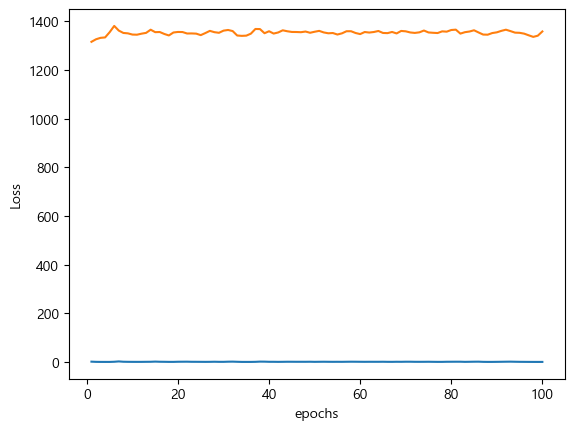

In [121]:
# Train the model and save the training history
history = model3.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose = 0)

# Access training and validation loss from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(training_loss)+1)
plt.plot(epochs, training_loss, label = 'Training loss')
plt.plot(epochs, validation_loss, label = 'Validation loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

### epochs = 1000

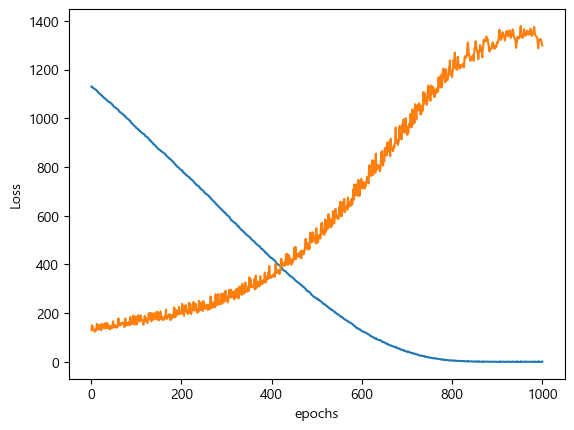

In [120]:
# Train the model and save the training history
history = model3.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), verbose = 0)

# Access training and validation loss from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(training_loss)+1)
plt.plot(epochs, training_loss, label = 'Training loss')
plt.plot(epochs, validation_loss, label = 'Validation loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

## epochs = 300

1/1 [==============================] - 0s 72ms/step
·MAE: 12.548665103270578
·MSE: 207.11650967082554
·RMSE: 14.391542991313528


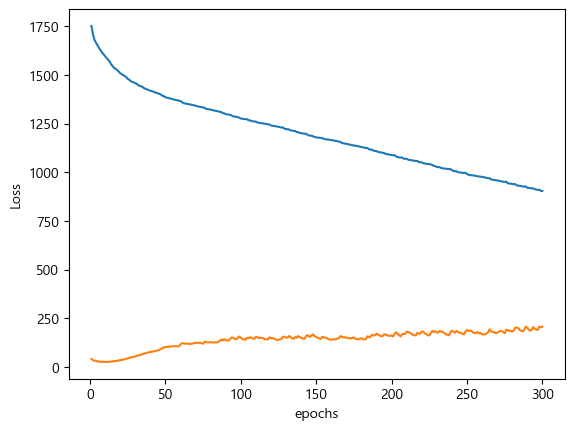

In [139]:
# train set, test set 분리
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, random_state=12)

# 모델 만들기

X = tf.keras.layers.Input(shape = [318])
H = tf.keras.layers.Dense(5, activation = 'swish')(X)
y = tf.keras.layers.Dense(1)(H)
model3 = tf.keras.models.Model(X,y)
model3.compile(loss = 'mse')

history = model3.fit(X_train, y_train, epochs = 300, verbose = 0, validation_data=(X_test, y_test))
y_pred = model3.predict(X_test)

print("·MAE:",mean_absolute_error(y_test, y_pred))
print("·MSE:", mean_squared_error(y_test, y_pred))
print("·RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("="*50)

# Access training and validation loss from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(training_loss)+1)
plt.plot(epochs, training_loss, label = 'Training loss')
plt.plot(epochs, validation_loss, label = 'Validation loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

## K-Fold Cross Validation

In [150]:
# Define the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model():
    model = Sequential()
    model.add(Dense(5, activation='swish', input_shape=(318,)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [154]:
# Define the K-Fold Cross-Validation Split

from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [174]:
# Train and Test the Model

mae_list = []
mse_list = []
rmse_list = []
r2_list = []

for train_index, test_index in kfold.split(dfX):
    X_train, X_test = dfX.loc[train_index], dfX.loc[test_index]
    y_train, y_test = dfy[train_index], dfy[test_index]

    tf.random.set_seed(42)
    model = create_model()
    model.fit(X_train, y_train, epochs=300, verbose=0)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

print("Mean MAE : {}\nMean MAE : {}\nMean RMSE : {}\nR-squared : {}".format(np.mean(mae_list), np.mean(mse_list), np.mean(rmse_list), np.mean(r2_list)))

1/1 [==============================] - 0s 96ms/step
Mean MAE : 16.610102100758972
Mean MAE : 1427.8262368670833
Mean RMSE : 23.664770726788195
R-squared : -3.326052866156593
